In [1]:
def gauss(im,k,ks):
    size=len(im)
    temp=np.zeros(im.shape,'uint8')
    for i in range(size-2):
        for j in range(size-2):
            tot=0
            for x in range(ks):
                for y in range(ks):
                    tot=tot+im[i+x,j+y]*k[x,y]
            tot=int(tot/16)
            temp[i,j]=tot
    return temp

In [2]:
def angle(x,y):
    size = x.shape[0]
    temp = np.zeros(x.shape,dtype=float)
    for i in range(0,size):
        for j in range(0,size):
            if(x[i,j] == 0):
                continue
            tot= math.atan(y[i,j]/x[i,j])
            temp[i,j] = tot * 180 / math.pi
    return temp

In [3]:
def sobel(im,gx,gy):
    size=len(im)
    tempi=np.zeros(im.shape,'uint8')
    hr = np.zeros(im.shape,'uint8')
    vr = np.zeros(im.shape,'uint8')
    for i in range(0,size-2):
        for j in range(0,size-2):
            totx=np.sum(im[i:i+3,j:j+3]*gx)
            toty=np.sum(im[i:i+3,j:j+3]*gy)
            fin=round(math.sqrt(totx*totx+toty*toty))
            tempi[i+1,j+1] = fin
            hr[i+1,j+1] = totx
            vr[i+1,j+1] = toty
    return (tempi,hr,vr)

In [4]:
def isLargest(a,b,c):
    if(b >= a and b >= c):
        return True
    return False

In [5]:
def nonMaximaSuppression(im,theta):
    size = im.shape[0]
    temp = np.zeros(im.shape,'uint8')
    for i in range(1,size-1):
        for j in range(1,size-1):
            angle = theta[i,j]
            dk = 0
            if((angle <= 22.5 and angle > -22.5) or (angle > 157.5 and angle <= -157.5)):
                dk = 0
            elif((angle <= 67.5 and angle > 22.5) or (angle > -157.5 and angle <= -112.5)):
                dk = 45
            elif((angle <= 112.5 and angle > 67.5) or (angle > -112.5 and angle <= -67.5)):
                dk = 90
            else:
                dk = 135
            
            if(dk == 0):
                if(isLargest(im[i-1,j],im[i,j],im[i+1,j])):
                    temp[i,j] = im[i,j]
            elif(dk == 45):
                if(isLargest(im[i-1,j-1],im[i,j],im[i+1,j+1])):
                    temp[i,j] = im[i,j]
            elif(dk == 90):
                if(isLargest(im[i,j-1],im[i,j],im[i,j-1])):
                    temp[i,j] = im[i,j]
            else:
                if(isLargest(im[i-1,j+1],im[i,j],im[i+1,j-1])):
                    temp[i,j] = im[i,j]
    return temp

In [6]:
def doubleEdging(im,low,high,mid):
    size = im.shape[0]
    temp = np.zeros(im.shape,'uint8')
    for i in range(0,size):
        for j in range(0,size):
            if(im[i,j] < low):
                temp[i,j] = 0
            elif(im[i,j] >= low and im[i,j] < high):
                temp[i,j] = mid
            else:
                temp[i,j] = 255
    return temp

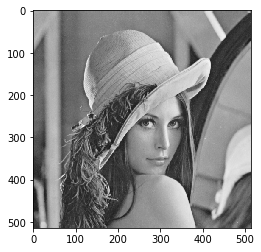

In [8]:
import cv2
import math
import numpy as  np
import matplotlib.pyplot as plt
image=cv2.imread("lena512color.tiff")
img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
img=np.pad(img,pad_width=1,mode='constant',constant_values=0)
plt.imshow(img,'gray')

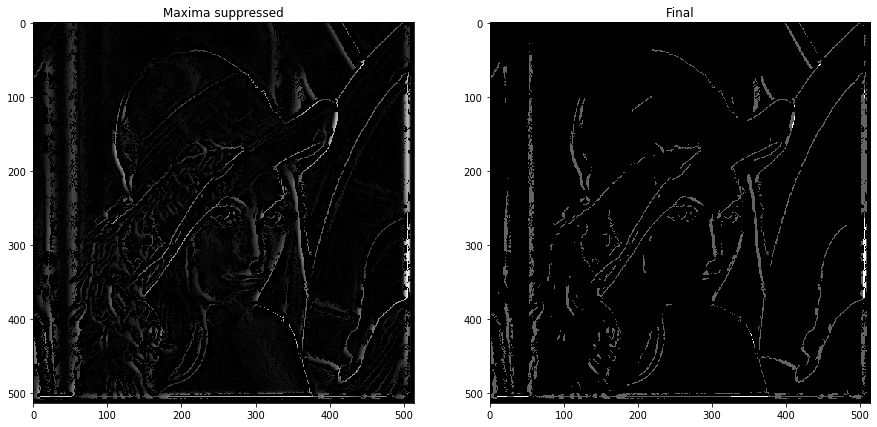

In [21]:
kernel_size=3
gx=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
gy=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])

img=gauss(img,kernel,3)

(M,horizontal,vertical) = sobel(img,gx,gy)

Ang = angle(horizontal,vertical)

maximasuppresed = nonMaximaSuppression(M,Ang)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Maxima suppressed')
plt.imshow(maximasuppresed,'gray')

doubleedged = doubleEdging(maximasuppresed,50,180,100)
plt.subplot(1,2,2)
plt.title('Final')
plt.imshow(doubleedged,'gray')
